In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import math

# Load data

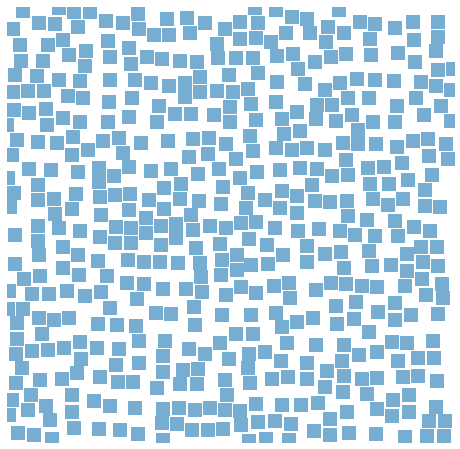

In [2]:
data = np.genfromtxt('pach5.csv',delimiter=',')
cells = 30
bits = 8
cellSize = 1 << bits
radius = cellSize / 2 
show_grid = False

fig_size_inch = 8
fig_ppi = 72

mapSize = cells * cellSize
fig, ax = plt.subplots()
fig.set_size_inches(fig_size_inch,fig_size_inch)

#ax = 
#ax.set_yticklabels(np.arange(0, cells))
#ax.set_xticklabels(np.arange(0, cells))
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlim(0, mapSize)
ax.set_ylim(0, mapSize)

points_whole_ax = 8 * 0.76 * 72    # 1 point = dpi / 72 pixels the 0.76 is PDOOMA

size = 2 * radius / mapSize * points_whole_ax
#size = 3

arr = np.array(data)
x = arr[:,0]
y = arr[:,1]

if (show_grid):
    ax.set_yticks(np.arange(0,mapSize,cellSize), minor=False)
    ax.set_xticks(np.arange(0,mapSize,cellSize), minor=False)
    yticks, _ = plt.yticks()
    for y0, y1 in zip(yticks[::2], yticks[1::2]):
        plt.axhspan(y0, y1, color='black', alpha=0.1, zorder=0)
    xticks, _ = plt.xticks()
    for x0, x1 in zip(xticks[::2], xticks[1::2]):
        plt.axvspan(x0, x1, color='black', alpha=0.1, zorder=0)
else:
    plt.axis('off')

plt.scatter(x, y, s=size * size, alpha=0.6, linewidths=0, marker="s")
#plt.scatter(x, y, s=10, alpha=0.8, linewidths=0, marker="o")

plt.savefig("example.svg", format="svg")
plt.show()


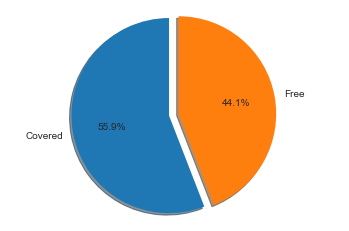

In [3]:

fig1, ax1 = plt.subplots()

labels = 'Covered', 'Free'
coveredArea = len(data) * (radius * 2) ** 2;
coverage = coveredArea /  (mapSize * mapSize)

sizes = [coverage , 1 - coverage ]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()